# ETAPE 1 : IMPORTATION DES LIBRAIRIES

In [1]:
# Importation des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# ETAPE 2 : CHARGER LES DONNEES

In [2]:
data = pd.read_csv('Data/Darknet_2.csv')
print(data.shape)
data

(141530, 85)


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,7/24/2015 16:09,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,7/24/2015 16:09,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,7/24/2015 16:09,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,7/24/2015 16:09,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,7/24/2015 16:09,10778451,591,400,...,0,0,0,0,1.437760e+15,3.117718e+06,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,5/22/2015 13:55,411806,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,5/22/2015 14:09,411574,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,5/22/2015 14:19,422299,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,5/22/2015 14:29,411855,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


In [3]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [4]:
data['Label'].unique()


array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

In [5]:
data['Label.1'].unique()

array(['AUDIO-STREAMING', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'File-transfer', 'P2P', 'Video-Streaming', 'Audio-Streaming',
       'Video-streaming', 'VOIP'], dtype=object)

# ETAPE 3 : ANALYSE DES DONNEES

In [6]:
# Étape 3 : Analyse de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [7]:
data.drop(columns='Flow ID', inplace=True, axis=1)
data.drop(columns='Src IP', inplace=True, axis=1)
data.drop(columns='Dst IP', inplace=True, axis=1)
data.drop(columns='Timestamp', inplace=True, axis=1)
data.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,57158,443,6,229,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,57159,443,6,407,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,57160,443,6,431,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,49134,443,6,359,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,34697,19305,6,10778451,591,400,64530,6659,131,0,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


# ETAPE 4 : PRETRAITEMENT DES DONNEES

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
data['Label'] = encoder.fit_transform(data['Label'])
data['Label.1'] = encoder.fit_transform(data['Label.1'])
data.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,57158,443,6,229,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
1,57159,443,6,407,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
2,57160,443,6,431,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
3,49134,443,6,359,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0,0
4,34697,19305,6,10778451,591,400,64530,6659,131,0,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,0,0


In [11]:
data.isnull().sum()

Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Label.1             0
Length: 81, dtype: int64

In [12]:
import seaborn as sns

<Axes: >

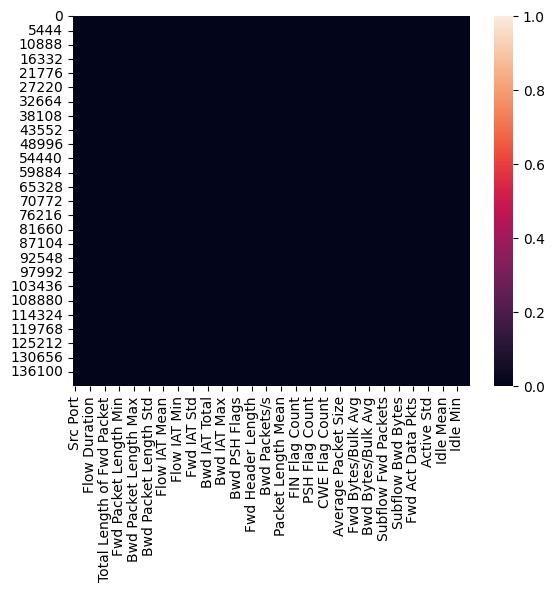

In [13]:
sns.heatmap(data.isnull())

In [14]:
data

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,57158,443,6,229,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
1,57159,443,6,407,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
2,57160,443,6,431,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
3,49134,443,6,359,1,1,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
4,34697,19305,6,10778451,591,400,64530,6659,131,0,...,0,0,0,0,1.437760e+15,3.117718e+06,1.437760e+15,1.437760e+15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,55219,5355,17,411806,2,0,44,0,22,22,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8
141526,64207,5355,17,411574,2,0,44,0,22,22,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8
141527,61115,5355,17,422299,2,0,44,0,22,22,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8
141528,64790,5355,17,411855,2,0,44,0,22,22,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8


# ETAPE 5 : DIVISION DES DONNEES (NORMALISATION DES DONNEES)

In [15]:
data.columns

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN

In [16]:
#Étape 5 : Diviser les données : Train et Test (Normaliser les données)
#X = data.drop(columns='label', inplace=True, axis=1)
#y = data['label']
a = data.iloc[ : , :-1]
b = data.iloc[ : , -1]

In [17]:
a

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,57158,443,6,229,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
1,57159,443,6,407,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
2,57160,443,6,431,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
3,49134,443,6,359,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
4,34697,19305,6,10778451,591,400,64530,6659,131,0,...,20,0,0,0,0,1.437760e+15,3.117718e+06,1.437760e+15,1.437760e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,55219,5355,17,411806,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
141526,64207,5355,17,411574,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
141527,61115,5355,17,422299,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
141528,64790,5355,17,411855,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3


In [18]:
b

0         0
1         0
2         0
3         0
4         0
         ..
141525    8
141526    8
141527    8
141528    8
141529    8
Name: Label.1, Length: 141530, dtype: int64

In [19]:
# Splitting 
from sklearn.model_selection import train_test_split

In [20]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [21]:
print("A-train:", a_train.shape)
print("A-test:", a_test.shape)
print("A-train:", b_train.shape)
print("A-train:", b_test.shape)

A-train: (113224, 80)
A-test: (28306, 80)
A-train: (113224,)
A-train: (28306,)


In [22]:
import numpy as np
print(np.isnan(a_train).sum())
print(np.isinf(a_train).sum())

Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Length: 80, dtype: int64
Src Port            0
Dst Port            0
Protocol            0
Flow Duration       0
Total Fwd Packet    0
                   ..
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
Label               0
Length: 80, dtype: int64


In [23]:
a_train = np.nan_to_num(a_train, nan=np.nanmean(a_train), posinf=np.nanmax(a_train), neginf=np.nanmin(a_train))
a_test = np.nan_to_num(a_test, nan=np.nanmean(a_test), posinf=np.nanmax(a_test), neginf=np.nanmin(a_test))

In [24]:
a_train = a_train[~np.isnan(a_train).any(axis=1)]
a_train = a_train[~np.isinf(a_train).any(axis=1)]

In [25]:
print("Max:", np.max(a_train))
print("Min:", np.min(a_train))
print("Mean:", np.mean(a_train))
print("Std:", np.std(a_train))

Max: 1456420000000000.0
Min: -2255.0
Mean: 26147399690018.004
Std: 190749266448267.72


In [26]:
import numpy as np

# Définir un seuil basé sur l'écart-type (ex: 3 fois la std)
threshold = np.mean(a_train) + 3 * np.std(a_train)

# Vérifier combien de valeurs dépassent ce seuil
print("Nombre de valeurs extrêmes :", np.sum(a_train > threshold))

Nombre de valeurs extrêmes : 165966


In [27]:
a_train = np.clip(a_train, a_min=-1e6, a_max=1e6)
a_test = np.clip(a_test, a_min=-1e6, a_max=1e6)

In [28]:
# Standariser les festures
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

In [29]:
a_train

array([[-0.14393675,  0.9059361 , -0.80010686, ...,  0.96303698,
         0.96303698, -0.6124101 ],
       [ 1.06675842, -0.57711736,  1.22528045, ..., -1.03838172,
        -1.03838172,  0.29659197],
       [-0.13081565, -0.81461302, -0.80010686, ...,  0.96303698,
         0.96303698, -0.6124101 ],
       ...,
       [-0.11461032, -0.81582864,  1.22528045, ..., -1.03838172,
        -1.03838172,  0.29659197],
       [-1.15875649, -0.81582864,  1.22528045, ..., -1.03838172,
        -1.03838172,  2.11459612],
       [-1.98643078,  1.87852021, -0.80010686, ..., -1.03838172,
        -1.03838172,  2.11459612]])

# ETAPE 6 : CONSTRUIRE LE SNN

In [30]:
# Étape 6 : Construire le Shallow Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [31]:
# Creation du model
model = Sequential()

In [32]:
# Couche d’entrée + première couche cachée
model.add(Dense(128, input_shape=(80,), activation='relu'))  # Augmenter les neurones
model.add(BatchNormalization())  # Normalisation pour une meilleure stabilité
model.add(Dropout(0.3))  # Dropout pour éviter l'overfitting

# Deuxième couche cachée
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Troisième couche cachée
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

# Couche de sortie
model.add(Dense(1, activation='sigmoid'))  # Binaire, sinon softmax pour plusieurs classes

# Compilation du modèle avec un learning rate réduit
optimizer = Adam(learning_rate=0.001)  # Teste aussi 0.0005 ou 0.0001
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Affichage de l’architecture du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,633 (84.50 KB)

 Trainable params: 21,185 (82.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [33]:
import numpy as np
a_train = np.array(a_train).reshape(-1, 80)
a_test = np.array(a_test).reshape(-1, 80)


In [34]:
print(a_train.shape)
print(a_test.shape)

(113187, 80)
(28306, 80)


In [35]:
import numpy as np
a_train = np.array(a_train)
a_test = np.array(a_test)

In [36]:
if isinstance(a_train, pd.DataFrame):
    a_train = a_train.iloc[:, :80]
    a_test = a_test.iloc[:, :80]

In [37]:
print(f"a_train shape: {a_train.shape}")  
print(f"b_train shape: {b_train.shape}")

a_train shape: (113187, 80)
b_train shape: (113224,)


In [38]:
b_train = b_train[:a_train.shape[0]]

In [39]:
import pandas as pd

print(pd.DataFrame(a_train).isna().sum().sum())  
print(pd.DataFrame(b_train).isna().sum().sum())  

print(np.isinf(a_train).sum())  
print(np.isinf(b_train).sum()) 


0
0
0
0


In [40]:
print(f"a_train shape: {a_train.shape}")  
print(f"b_train shape: {b_train.shape}")  
print(f"a_test shape: {a_test.shape}")    
print(f"b_test shape: {b_test.shape}")   

a_train shape: (113187, 80)
b_train shape: (113187,)
a_test shape: (28306, 80)
b_test shape: (28306,)


In [41]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [42]:
print("Taille de a_train :", a_train.shape)
print("Taille de b_train :", b_train.shape)
print("Taille de a_test  :", a_test.shape)
print("Taille de b_test  :", b_test.shape)

Taille de a_train : (113187, 80)
Taille de b_train : (113187,)
Taille de a_test  : (28306, 80)
Taille de b_test  : (28306,)


In [43]:
# Trouver la taille minimale entre a_train et b_train
min_train_size = min(a_train.shape[0], b_train.shape[0])

# Ajuster les tailles pour qu'elles correspondent
a_train = a_train[:min_train_size]
b_train = b_train[:min_train_size]

In [44]:
print("Nouvelle taille de a_train :", a_train.shape)
print("Nouvelle taille de b_train :", b_train.shape)

Nouvelle taille de a_train : (113187, 80)
Nouvelle taille de b_train : (113187,)


In [45]:
# Entrainement du modele
history = model.fit(a_train, b_train, epochs=50, batch_size=32, 
                    validation_data=(a_test, b_test), 
                    callbacks=[reduce_lr, early_stop])

Epoch 1/50
3538/3538 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.1091 - loss: -348.9909 - val_accuracy: 0.1171 - val_loss: -2985.4973 - learning_rate: 0.0010
Epoch 2/50
3538/3538 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.1170 - loss: -4355.5049 - val_accuracy: 0.1171 - val_loss: -9986.2158 - learning_rate: 0.0010
Epoch 3/50
3538/3538 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.1163 - loss: -11930.5889 - val_accuracy: 0.1171 - val_loss: -20221.7363 - learning_rate: 0.0010
Epoch 4/50
3538/3538 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.1154 - loss: -22588.2188 - val_accuracy: 0.1171 - val_loss: -33860.3789 - learning_rate: 0.0010
Epoch 5/50
3538/3538 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.1175 - loss: -36494.8281 - val_accuracy: 0.1171 - val_loss: -50224.2305 - learning_rate: 0.0010
Epoch 6/50
3538/3538 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.1179 - loss: -52971.0234 - val_accuracy: 0.1171 - val_loss: -69730.9844 - learning_rate: 0.0010
Epoch 7/50
3538

# ETAPE 7 : VISUALISATION DE L'ENTRAINEMENT DU RESEAU DE NEURONE

In [46]:
history

In [47]:
# Étape 7 : Visualiser l’évolution de l’entrainement du réseau de neurone
import matplotlib.pyplot as plt

In [48]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

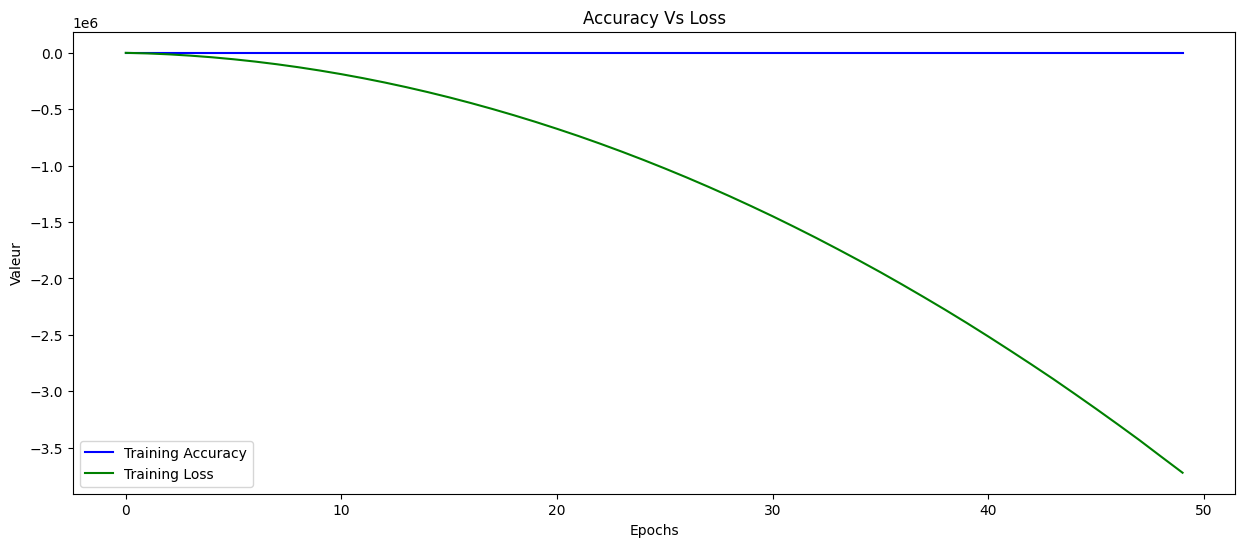

In [49]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='green', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss')
plt.legend()
plt.plot()
plt.show()

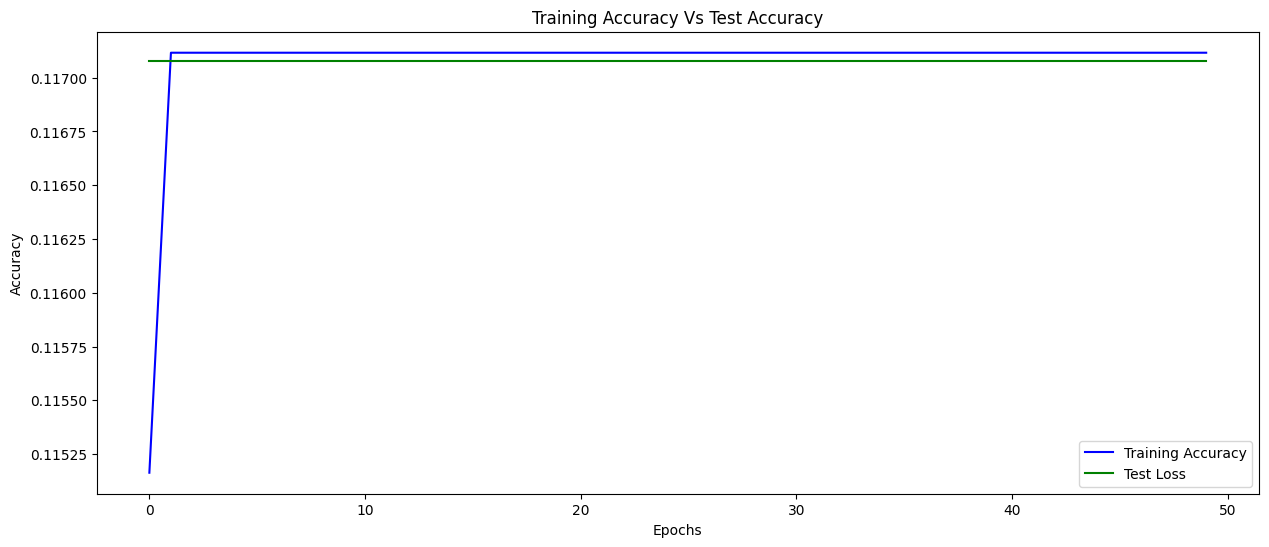

In [50]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='green', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy')
plt.legend()
plt.show()

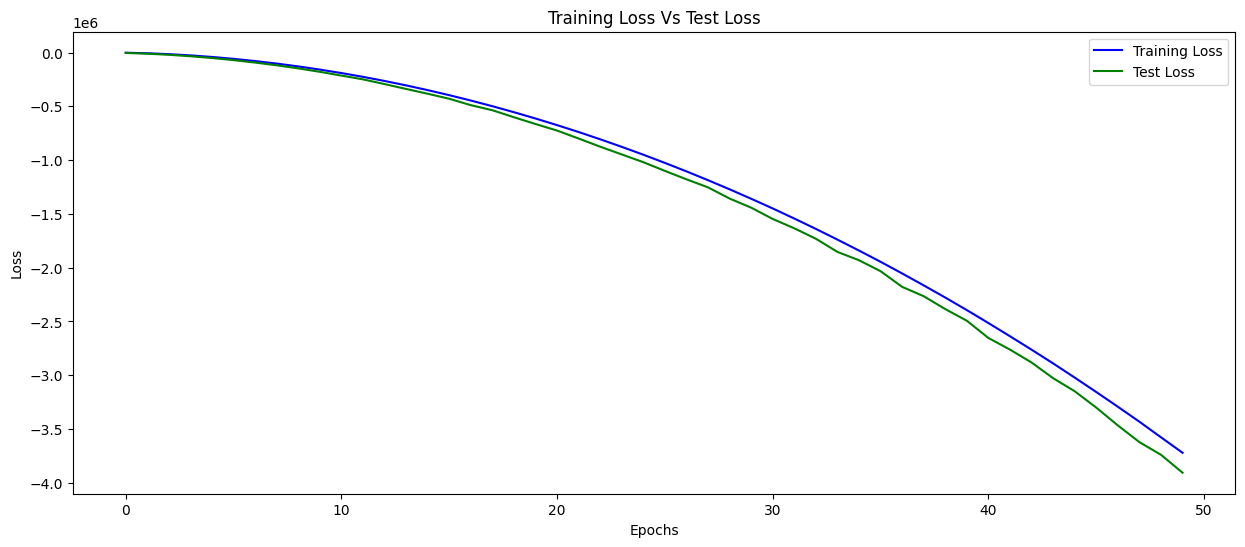

In [51]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='green', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.show()

# ETAPE 8 : EVALUER LE MODELE

In [52]:
# Étape 8 : Evaluer le modèle
model.evaluate(a_test, b_test)

885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1160 - loss: -3917212.0000


[-3907018.75, 0.11707764863967896]